# ORIE 4580/5580/5581 Assignment 4

#### Students: K. Bond (klb298)

### Github link: [Kimberly's Github link](https://github.com/kimbond0071/ORIE5580Homeworks)

https://github.com/kimbond0071/ORIE5580Homeworks

### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [1]:
## First draft built with google gemeni in colab
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import scipy.linalg as scl
%matplotlib inline

# Would you prefer we set a random seed for problems like these?
# For now I will keep things truly random

# Generate 10,000 independent passenger arrival times uniformly distributed over [0, 1000]
passenger_arrivals = np.random.uniform(0, 1000, 10000)

# Sort the passenger arrival times
passenger_arrivals = np.sort(passenger_arrivals)

# Display the first few arrival times to verify
print("First 10 passenger arrival times (sorted):")
print(passenger_arrivals[:10])


First 10 passenger arrival times (sorted):
[0.13845969 0.24215355 0.36782966 0.40585649 0.70009235 0.7887552
 0.94752348 0.94974724 1.25246926 1.33223794]


<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [2]:
# First draft written with Gemini - helped understand problem
train_arrivals = np.arange(0, 1010, 10)
next_train_arrival = train_arrivals[np.searchsorted(train_arrivals, passenger_arrivals)]
waiting_times = next_train_arrival - passenger_arrivals

# calculate the expected waiting time
expected_waiting_time = np.mean(waiting_times)

# calculate confidence interval for expected wait time - code from recitations
# used normal because sample size is large enough?

m = len(waiting_times)
avg = expected_waiting_time
LB = avg - scs.norm.ppf(0.975)*np.sqrt(np.var(waiting_times, ddof=1)/m)
UB = avg + scs.norm.ppf(0.975)*np.sqrt(np.var(waiting_times, ddof=1)/m)

print(LB, UB)


4.8959797970758965 5.008273844337871


A 95% confidence interval based on normal approximation is printed above.

<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [23]:
# First draft of code generated with Gemini
# Simulate train arrivals with exponential inter-arrival times (mean 10 minutes)
# Generate enough inter-arrival times to cover the passenger arrival interval [0, 1000]
# A rough estimate: 1000 minutes / 10 minutes/train = 100 trains on average.
# Let's generate inter-arrival times for a larger number of trains to be safe, e.g., 300.
n_trains_to_simulate = 300
inter_arrival_times = np.random.exponential(scale=10, size=n_trains_to_simulate)

# Calculate the cumulative arrival times of the trains
train_arrivals_exp = np.cumsum(inter_arrival_times)

# Filter train arrivals to be within a reasonable range of passenger arrivals
# We only need train arrivals that are relevant to the passengers' waiting times
train_arrivals_exp = train_arrivals_exp[train_arrivals_exp < 1010] # Keep trains arriving within the 1000 min interval + a buffer

# For each passenger, find the arrival time of the next train
# Use side='right' to find the index of the first element GREATER than the passenger arrival time
next_train_arrival_exp = train_arrivals_exp[np.searchsorted(train_arrivals_exp, passenger_arrivals, side='right')]

# Calculate the waiting time for each passenger
waiting_times_exp = next_train_arrival_exp - passenger_arrivals

# Estimate the expected waiting time
expected_waiting_time_exp = np.mean(waiting_times_exp)
print(f"Estimated expected waiting time (Exponential arrivals): {expected_waiting_time_exp:.4f}")

# Confidence Interval
m_exp = len(waiting_times_exp)
avg_exp = expected_waiting_time_exp
LB_exp = avg_exp - scs.norm.ppf(0.975)*np.sqrt(np.var(waiting_times_exp, ddof=1)/m_exp)
UB_exp = avg_exp + scs.norm.ppf(0.975)*np.sqrt(np.var(waiting_times_exp, ddof=1)/m_exp)

print(f"95% Confidence Interval (Exponential arrivals): ({LB_exp:.4f}, {UB_exp:.4f})")

Estimated expected waiting time (Exponential arrivals): 9.8186
95% Confidence Interval (Exponential arrivals): (9.6159, 10.0213)


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).) I was just looking at my restults thinking that!

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [25]:
# First draft written with Gemini
# Calculate the inter-arrival times from the simulated train arrivals in part (b)
# The inter-arrival times are the differences between consecutive train arrival times
inter_arrival_times_observed = np.diff(train_arrivals_exp)

# Estimate the mean of the observed inter-arrival times
mean_inter_arrival_time_observed = np.mean(inter_arrival_times_observed)
print(f"Estimated mean inter-arrival time (observed): {mean_inter_arrival_time_observed:.4f}")

m_tbt = len(inter_arrival_times_observed)
avg_tbt = mean_inter_arrival_time_observed
LB_tbt = avg_tbt - scs.norm.ppf(0.975)*np.sqrt(np.var(waiting_times_exp, ddof=1)/m_tbt)
UB_tbt = avg_tbt + scs.norm.ppf(0.975)*np.sqrt(np.var(waiting_times_exp, ddof=1)/m_tbt)

print(f"95% Confidence Interval for mean inter-arrival time (observed): ({LB_tbt:.4f}, {UB_tbt:.4f})")

Estimated mean inter-arrival time (observed): 9.8173
95% Confidence Interval for mean inter-arrival time (observed): (7.8100, 11.8246)


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, then we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [35]:
#First draft written with Gemini

train_taken_arrival_det = train_arrivals[np.searchsorted(train_arrivals, passenger_arrivals)]

train_taken_indices = np.searchsorted(train_arrivals, passenger_arrivals)

prev_train_taken_indices = np.maximum(0, train_taken_indices - 1)
prev_train_arrival_det = train_arrivals[prev_train_taken_indices]

experienced_inter_arrival_det = train_taken_arrival_det - prev_train_arrival_det

# Compute the sample mean and CI for the experienced inter-arrival time in the deterministic case
mean_experienced_inter_arrival_det = np.mean(experienced_inter_arrival_det)
print(f"Estimated average experienced inter-arrival time (Deterministic arrivals): {mean_experienced_inter_arrival_det:.4f}")

m_da = len(inter_arrival_times_observed)
avg_da = mean_experienced_inter_arrival_det
LB_da = avg_da - scs.norm.ppf(0.975)*np.sqrt(np.var(experienced_inter_arrival_det, ddof=1)/m_da)
UB_da = avg_da + scs.norm.ppf(0.975)*np.sqrt(np.var(experienced_inter_arrival_det, ddof=1)/m_da)

print(f"95% Confidence Interval for mean inter-arrival time (Deterministic arrivals): ({LB_da:.4f}, {UB_da:.4f})")

train_taken_arrival_exp = train_arrivals_exp[np.searchsorted(train_arrivals_exp, passenger_arrivals, side='right')]

train_taken_indices_exp = np.searchsorted(train_arrivals_exp, passenger_arrivals, side='right')

prev_train_taken_indices_exp = np.maximum(0, train_taken_indices_exp - 1)

valid_indices = prev_train_taken_indices_exp > 0
prev_train_arrival_exp = np.zeros_like(train_taken_arrival_exp)
prev_train_arrival_exp[valid_indices] = train_arrivals_exp[prev_train_taken_indices_exp[valid_indices]]

experienced_inter_arrival_exp = train_taken_arrival_exp[valid_indices] - prev_train_arrival_exp[valid_indices]

# Compute the sample mean and CI for the experienced inter-arrival time in the exponential case
mean_experienced_inter_arrival_exp = np.mean(experienced_inter_arrival_exp)
print(f"Estimated average experienced inter-arrival time (Exponential arrivals): {mean_experienced_inter_arrival_exp:.4f}")

m_ea = len(inter_arrival_times_observed)
avg_ea = mean_experienced_inter_arrival_exp
LB_da = avg_ea - scs.norm.ppf(0.975)*np.sqrt(np.var(experienced_inter_arrival_exp, ddof=1)/m_ea)
UB_da = avg_ea + scs.norm.ppf(0.975)*np.sqrt(np.var(experienced_inter_arrival_exp, ddof=1)/m_ea)
print(f"95% Confidence Interval (Exponential arrivals): ({LB_da:.4f}, {UB_da:.4f})")

Estimated average experienced inter-arrival time (Deterministic arrivals): 10.0000
95% Confidence Interval for mean inter-arrival time (Deterministic arrivals): (10.0000, 10.0000)
Estimated average experienced inter-arrival time (Exponential arrivals): 19.6071
95% Confidence Interval (Exponential arrivals): (16.6622, 22.5520)


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{𝑆} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

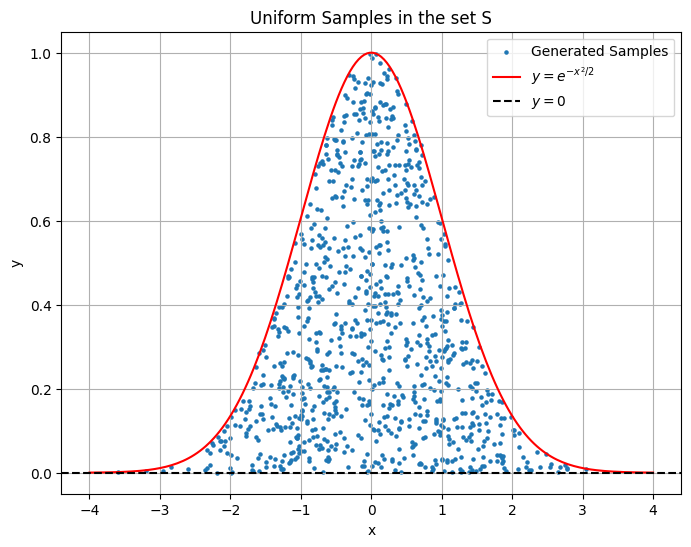

In [36]:
# First draft written with Gemini
# Part 2(a): Sample points uniformly in the set S = {(x,y) | x in R, y in [0, e^(-x^2/2)]}

# The density function f(x) = e^(-x^2/2) is proportional to the PDF of a normal distribution N(0, 1).
# To sample uniformly in the region under the curve, we can use a method similar to acceptance-rejection sampling, but in reverse.
# We can sample x from a normal distribution and then sample y uniformly between 0 and f(x).

# Number of samples
n_samples = 1000

# Sample x from a standard normal distribution (mean=0, std=1)
x_samples = np.random.normal(0, 1, n_samples)

# For each x, sample y uniformly between 0 and e^(-x^2/2)
y_bounds = np.exp(-x_samples**2 / 2)
y_samples = np.random.uniform(0, y_bounds)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(x_samples, y_samples, s=5, label='Generated Samples')

# Plot the boundary lines
x_plot = np.linspace(-4, 4, 200) # Plot over a reasonable range of x
y_upper_bound = np.exp(-x_plot**2 / 2)
plt.plot(x_plot, y_upper_bound, color='red', label=r'$y = e^{-x^2/2}$')
plt.axhline(0, color='black', linestyle='--', label='$y = 0$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform Samples in the set S')
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

Based on the plots seen below, the points do not appear to be uniformly distributed on the circumference of the unit circle. They appear to have some sort of oscillation.

In [40]:
# Code from homework 1 and then adjusted for this problem
## Set Max n
maxn = 1000

#sample to get N_circle
U = np.random.uniform(-1, 1, size=maxn)
V = np.random.uniform(-1, 1, size=maxn)
X = U/(np.sqrt(U**2 + V**2))
Y = V/(np.sqrt(U**2 + V**2))

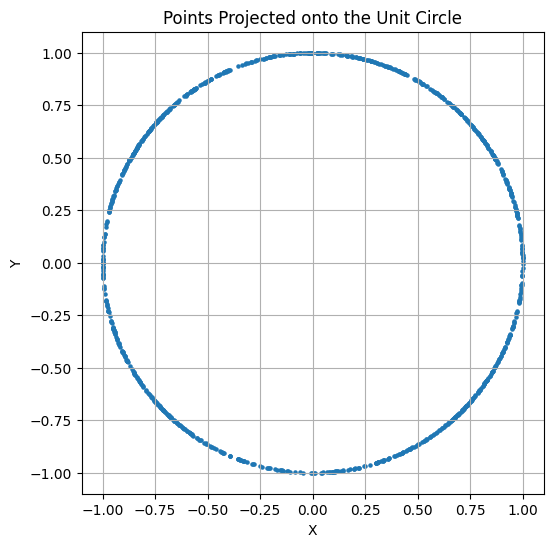

In [ ]:
# Plot the generated points on the unit circle - plots generated with the help of gemini
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, s=5, label='Projected Samples')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Points Projected onto the Unit Circle (Usings U,V)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

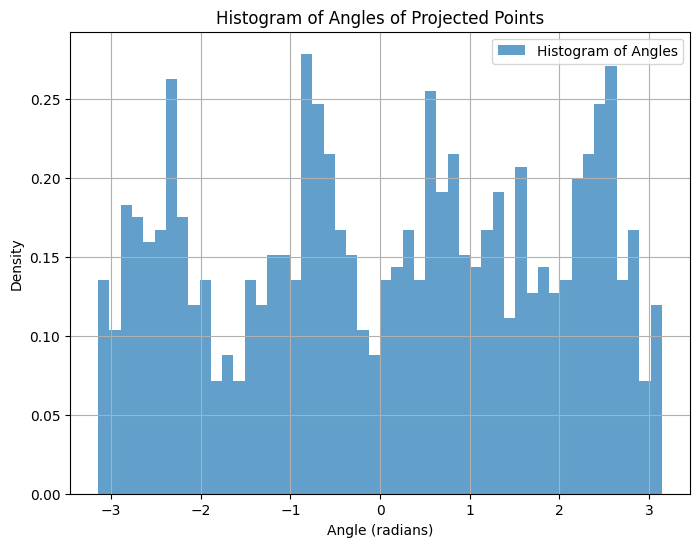

In [42]:
# Plot the histogram of the angles
plt.figure(figsize=(8, 6))
# Calculate angles in radians, then convert to degrees for easier interpretation if desired
# The atan2 function is better than atan for handling angles across all quadrants
angles_rad = np.arctan2(Y, X)
plt.hist(angles_rad, bins=50, density=True, alpha=0.7, label='Histogram of Angles')
plt.title('Histogram of Angles of Projected Points')
plt.xlabel('Angle (radians)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{𝒩}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

Yes, these points seem much more uniformly distributed on the circumference of the unit circle. The histogram is much more consistent, and based on applying with a larger sample size, they appear consistently uniform. The difference between parts b and c stems from sampling from a square (uniformly on $[1, 1]^2$) causes the projects to be weighted heavier on the diagonal angles (45, 135, etc degrees). The uniform sampling of a square causes equal distribution of the points in that square, but when projected to the unit circle, there are more points located on places where there would be more area in the square for points to be generated.

On the converse, sampling from a standard normal and then projecting to the unit circle leads to uniform distribution on the cisrcumference. This is because he bivariate standard normal is "rotation invariant" according to chatgpt, leading to theta being uniformly distributed.

In [55]:
## Set Max n
maxn = 1000

#sample to get N_circle
Z = np.random.normal(0, 1, size=maxn)
W = np.random.normal(0, 1, size=maxn)
X = Z/(np.sqrt(Z**2 + W**2))
Y = W/(np.sqrt(Z**2 + W**2))

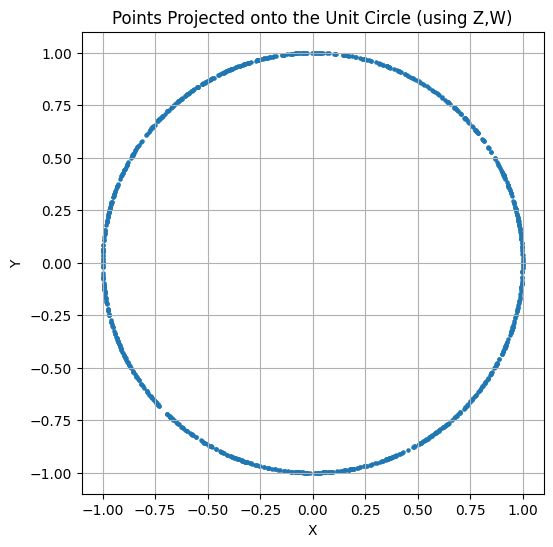

In [53]:
#Code from previous scatterplots and histogram (AKA Gemini generated)
# Plot the generated points on the unit circle
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, s=5, label='Projected Samples')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Points Projected onto the Unit Circle (using Z,W)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

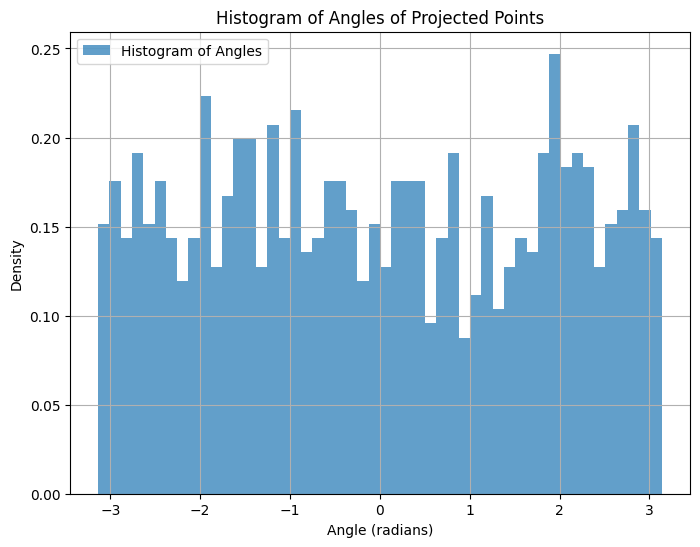

In [54]:
# Plot the histogram of the angles
plt.figure(figsize=(8, 6))
# Calculate angles in radians, then convert to degrees for easier interpretation if desired
# The atan2 function is better than atan for handling angles across all quadrants
angles_rad = np.arctan2(Y, X)
plt.hist(angles_rad, bins=50, density=True, alpha=0.7, label='Histogram of Angles')
plt.title('Histogram of Angles of Projected Points')
plt.xlabel('Angle (radians)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.

**(a) Probability all three have positive returns**

Assume returns are **independent** and normally distributed:
$$
\text{US stocks: } X \sim \mathcal{N}(0.14,\;0.0625), \qquad
\text{US bonds: } Y \sim \mathcal{N}(0.07,\;0.01), \qquad
\text{EM bonds: } Z \sim \mathcal{N}(0.11,\;0.09).
$$

By independence,
$$
\mathbb{P}(\text{all three have positive returns})
= \mathbb{P}(X>0)\,\mathbb{P}(Y>0)\,\mathbb{P}(Z>0).
$$

Numerically as calculated below,
$$
\mathbb{P}(\text{all positive}) \approx 0.37960164.
$$

<hr>

In [56]:
import scipy.stats as scs

# Gemini used to change my R code (one line very easy) to Python, and it gave me additional stuff lol
# The parameters for the three normal distributions
# Mean and standard deviation (sqrt of variance)
mean_us_stocks = 0.14
std_dev_us_stocks = np.sqrt(0.0625) # Variance is 0.0625

mean_us_bonds = 0.07
std_dev_us_bonds = np.sqrt(0.01) # Variance is 0.01

mean_em_bonds = 0.16
std_dev_em_bonds = np.sqrt(0.09) # Variance is 0.09

# Calculate P(X > 0) for each independent normal distribution
# In scipy.stats.norm.cdf, P(X <= x) is calculated.
# P(X > x) = 1 - P(X <= x)
prob_us_stocks_positive = 1 - scs.norm.cdf(0, loc=mean_us_stocks, scale=std_dev_us_stocks)
prob_us_bonds_positive = 1 - scs.norm.cdf(0, loc=mean_us_bonds, scale=std_dev_us_bonds)
prob_em_bonds_positive = 1 - scs.norm.cdf(0, loc=mean_em_bonds, scale=std_dev_em_bonds)

# Since the assets are assumed independent in this part, the joint probability
# is the product of the individual probabilities.
probability_all_positive = prob_us_stocks_positive * prob_us_bonds_positive * prob_em_bonds_positive

print(f"Probability that U.S. stocks yield a positive return: {prob_us_stocks_positive:.4f}")
print(f"Probability that U.S. bonds yield a positive return: {prob_us_bonds_positive:.4f}")
print(f"Probability that EM bonds yield a positive return: {prob_em_bonds_positive:.4f}")
print(f"Probability that all three simultaneously yield a positive return (independent): {probability_all_positive:.8f}")

Probability that U.S. stocks yield a positive return: 0.7123
Probability that U.S. bonds yield a positive return: 0.7580
Probability that EM bonds yield a positive return: 0.7031
Probability that all three simultaneously yield a positive return (independent): 0.37961641


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [4]:
import numpy as np
from scipy.linalg import cholesky
from scipy.stats import norm

# --- inputs from the problem ---
mu = np.array([0.14, 0.07, 0.11])  # means
Sigma = np.array([
    [0.0625, -0.01,   0.0375],
    [-0.01,   0.01,  -0.015 ],
    [0.0375, -0.015,  0.09  ],
])

# 1) Cholesky factor: Sigma = L L^T
L = cholesky(Sigma, lower=True)

# 2) Simulate independent N(0,1) and map to the target MVN
rng = np.random.default_rng(7)
n = 200_000
Z = rng.standard_normal((3, n))        # columns are draws of Z ~ N(0, I_3)
X = mu[:, None] + L @ Z                # X ~ N(mu, Sigma)

# 3) Estimate P(all three > 0)
hits = np.all(X > 0, axis=0)
p_hat = hits.mean()

# 4) 95% CI via binomial normal approx
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci = (p_hat - 1.96 * se, p_hat + 1.96 * se)

print(f"Estimated P(all > 0): {p_hat:.6f}")
print(f"95% CI: ({ci[0]:.6f}, {ci[1]:.6f})")

# independence baseline for comparison
sigmas = np.sqrt(np.diag(Sigma))
p_ind = np.prod(norm.cdf(mu / sigmas))
print(f"Independent baseline (optional): {p_ind:.6f}")


Estimated P(all > 0): 0.338955
95% CI: (0.336880, 0.341030)
Independent baseline (optional): 0.347204


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.


Generate $V_1, V_2$ with mean $E[V_1] = E[V_2] = 0$  
and variance $\mathrm{Var}(V_1) = \mathrm{Var}(V_2) = 1$  
and covariance $\mathrm{Cov}(V_1, V_2) = \sigma_{12}, \quad (\sigma_{12} \geq 0)$  

For what $\alpha, \beta \in \mathbb{R}$ does a uniform distributed on $[\alpha, \beta]$ have mean $0$ and variance $1$?  

---

For a uniform distribution $U$:  

$$
\mathrm{Var}(U) = \frac{(b-a)^2}{12}, \qquad
E[U] = \frac{a+b}{2}
$$  

We know $E[V_1] = 0$, thus  

$$
\frac{a+b}{2} = 0
$$  

$$
a+b = 0
$$  

$$
a = -b
$$  

And from this, $\mathrm{Var}(V_1) = 1$, thus  

$$
\frac{(b-a)^2}{12} = 1
$$  

$$
(b-a)^2 = 12
$$  

Since $a = -b$:  

$$
b - (-b) = \sqrt{12}
$$  

$$
2b = \sqrt{12}
$$  

$$
b = \frac{\sqrt{12}}{2}
$$  

$$
b = \sqrt{3}
$$  

Thus,  

$$
\beta = \sqrt{3}, \qquad \alpha = -\sqrt{3}
$$  


<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.

We know $E[V_1] = 0$ and $\mathrm{Var}(V_1) = 1$.  

Now,  

$$
E[V_2] = E\big[(1-B)X_1 + B X_2 \big]
$$  

$$
= E[(1-B)]E[X_1] + E[B]E[X_2]
$$  

$$
= (1-p)(0) + p(0)
$$  

$$
= 0
$$  

---

$$
\mathrm{Var}[V_2] = E[V_2^2] - (E[V_2])^2
$$  

Since  
$$
V_2^2 = (1-B)X_1^2 + B X_2^2
$$  

we get  

$$
\mathrm{Var}[V_2] = E\big[(1-B)X_1^2 + B X_2^2\big]
$$  

$$
= (1-p)E[X_1^2] + pE[X_2^2]
$$  

$$
= (1-p)(1) + p(1)
$$  

$$
= 1
$$  



<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.


$$
\mathrm{Cov}(V_1, V_2) = E[V_1 V_2] - E[V_1]E[V_2]
$$  

Now, since  

$$
V_1 V_2 = X_1 \big((1-B)X_1 + B X_2 \big) = (1-B)X_1^2 + B X_2 X_1,
$$  

we have  

$$
\mathrm{Cov}(V_1, V_2) = E\big[(1-B)X_1^2 + B X_2 X_1\big] - 0
$$  

$$
= (1-p)E[X_1^2] + pE[X_2]E[X_1] \quad \text{(since $B, X_1, X_2$ are independent)}
$$  

$$
= (1-p)(1) + p(0)(0)
$$  

$$
= 1 - p
$$  

Thus,  

$$
\sigma_{12} = 1 - p
$$  

which implies  

$$
p = 1 - \sigma_{12}.
$$  


<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

I will go through with this problem assuming that $Cov(U_1, U_2)$ is meant to be $Cov(V_1, V_2)$.

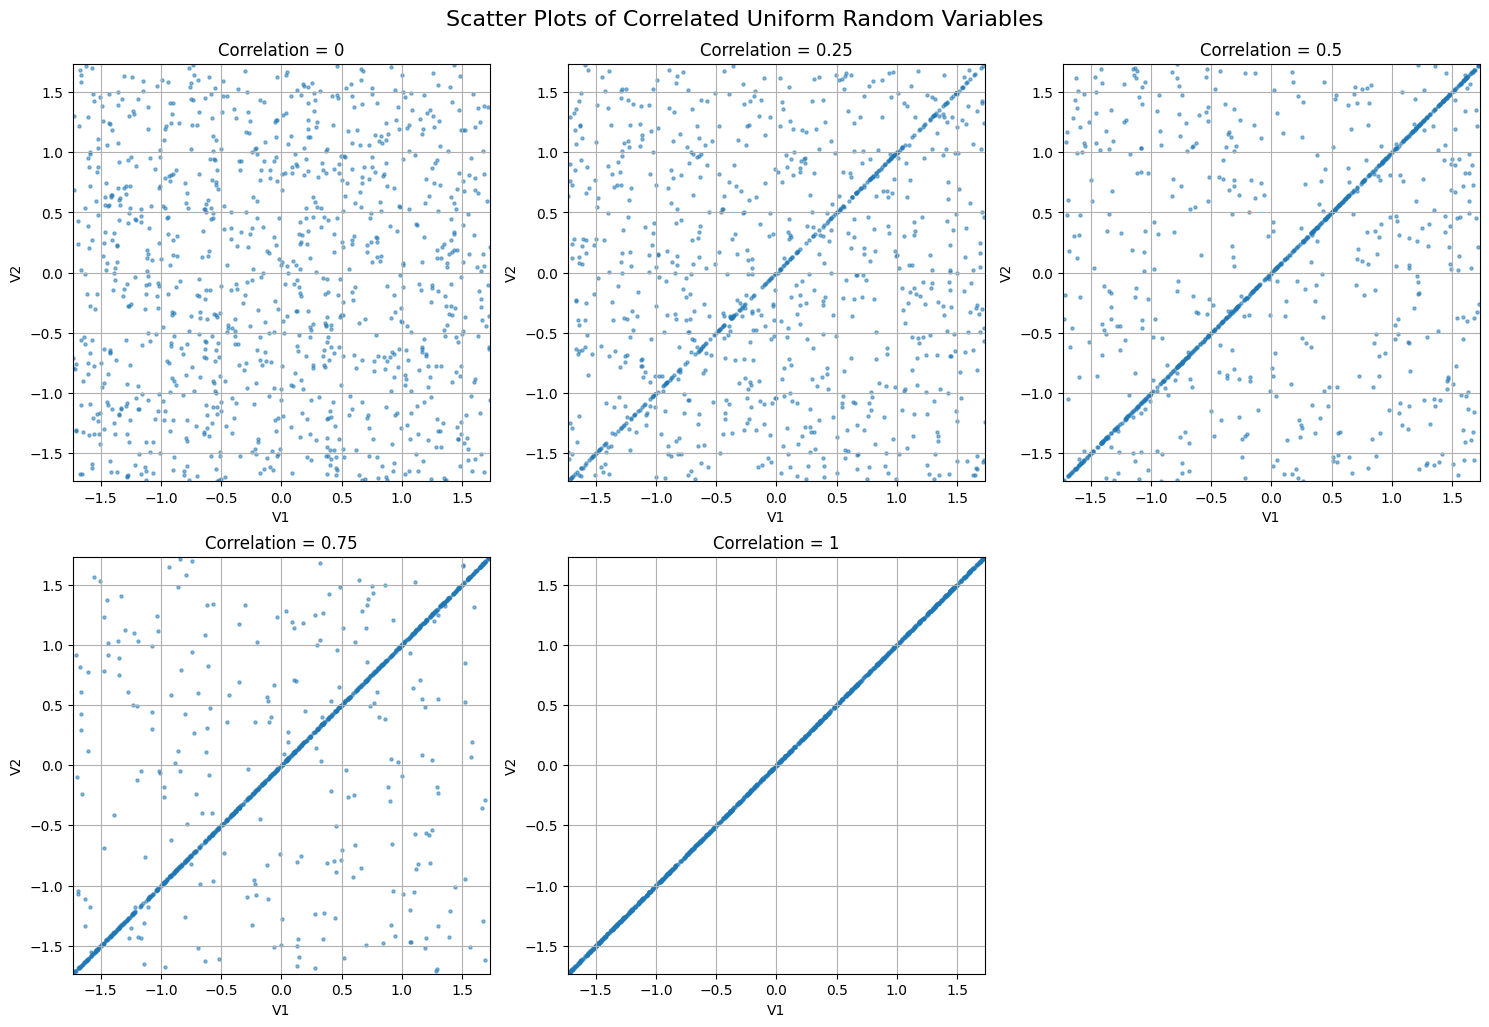

In [5]:
# First draft generated with gemini

import numpy as np
import matplotlib.pyplot as plt

# Based on part (a), for a uniform distribution on [alpha, beta] to have mean 0 and variance 1:
alpha = -np.sqrt(3)
beta = np.sqrt(3)

def generate_correlated_uniforms(sigma_12, n_samples=1000):
    """
    Generates two correlated uniform random variables V1, V2
    with mean 0, variance 1, and covariance sigma_12.

    Args:
        sigma_12 (float): The desired covariance between V1 and V2 (>= 0).
        n_samples (int): The number of samples to generate.

    Returns:
        tuple: A tuple containing two numpy arrays, V1 and V2.
    """
    if not 0 <= sigma_12 <= 1:
         raise ValueError("sigma_12 must be between 0 and 1 for this method.")

    # From part (c), p = 1 - sigma_12
    p = 1 - sigma_12

    # Generate independent uniform rvs X1, X2 on [alpha, beta]
    X1 = np.random.uniform(alpha, beta, size=n_samples)
    X2 = np.random.uniform(alpha, beta, size=n_samples)

    # Generate Bernoulli rvs B
    B = np.random.binomial(1, p, size=n_samples)

    # Define V1 and V2
    V1 = X1
    V2 = (1 - B) * X1 + B * X2

    return V1, V2

# Correlation values to plot
correlation_values = [0, 0.25, 0.5, 0.75, 1]

# Generate and plot for each correlation value
plt.figure(figsize=(15, 10))

for i, sigma in enumerate(correlation_values):
    V1, V2 = generate_correlated_uniforms(sigma)

    plt.subplot(2, 3, i + 1) # Create a subplot for each correlation value
    plt.scatter(V1, V2, s=5, alpha=0.5)
    plt.title(f'Correlation = {sigma}')
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.xlim(alpha, beta) # Set limits to the range [alpha, beta]
    plt.ylim(alpha, beta)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Scatter Plots of Correlated Uniform Random Variables', y=1.02, fontsize=16)
plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [9]:
# First draft generated with Gemini
# Part (e): Compute P[V1 <= 0, V2 <= 0] for sigma_12 = 0.5

# Use the function to generate correlated uniform samples with sigma_12 = 0.5
sigma_12_e = 0.5
n_samples_e = 10000000
V1_e, V2_e = generate_correlated_uniforms(sigma_12_e, n_samples=n_samples_e)

# Count the number of samples where both V1 <= 0 and V2 <= 0
count_both_le_0 = np.sum((V1_e <= 0) & (V2_e <= 0))

# Estimate the probability
probability_both_le_0 = count_both_le_0 / n_samples_e

print(f"Estimated P[V1 <= 0, V2 <= 0] for sigma_12 = {sigma_12_e}: {probability_both_le_0:.6f}")

Estimated P[V1 <= 0, V2 <= 0] for sigma_12 = 0.5: 0.375040


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.

For any $u \in [0,1]$:  

$$
P(F(Z_j) \leq u) = P(Z_j \leq F^{-1}(u)) = F(F^{-1}(u)) = u
$$  

Thus,  

$$
F(Z_j) = U_j \sim \text{Unif}(0,1), \quad \text{for } j=1,2
$$  

---

We now have  

$$
W_j = \alpha + (\beta - \alpha) U_j
$$  

Then, for any $w$:  

$$
P(W_j \leq w) = P\big(\alpha + (\beta - \alpha)U_j \leq w\big)
$$  

$$
= P\left(U_j \leq \frac{w - \alpha}{\beta - \alpha}\right)
$$  

$$
= \frac{w - \alpha}{\beta - \alpha}, \quad \text{which is the CDF of } \text{Unif}(\alpha,\beta)
$$  

---

Thus,  

$$
W_j \sim \text{Unif}(\alpha, \beta)
$$  

and  

$$
E[W_j] = 0, \quad \mathrm{Var}(W_j) = 1 \quad \text{(as shown previously).}
$$  



Monte Carlo P[W1>=0, W2>=0] ≈ 0.3329 (theory = 1/3 ≈ 0.3333)


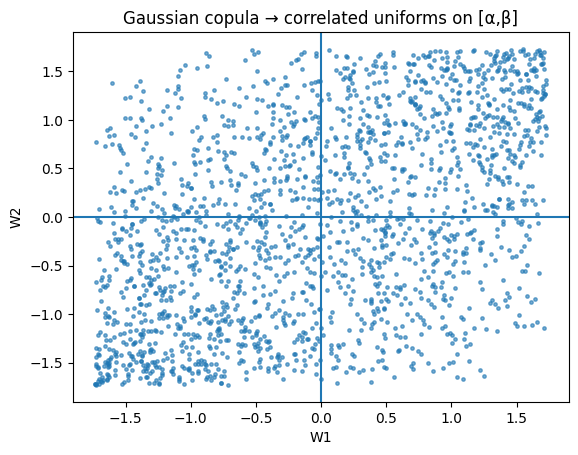

In [ ]:
# First draft written with chat GPT

import numpy as np
from scipy.linalg import cholesky
from scipy.stats import norm
import matplotlib.pyplot as plt

# params
alpha, beta = -np.sqrt(3), np.sqrt(3)
Sigma = np.array([[1.0, 0.5],
                  [0.5, 1.0]])
L = cholesky(Sigma, lower=True)

# simulate
n = 200000
rng = np.random.default_rng(0)
Z = L @ rng.standard_normal((2, n))    # correlated N(0,Sigma)
U = norm.cdf(Z)                        # PIT -> uniforms on (0,1)
W = alpha + (beta - alpha) * U         # uniforms on [alpha,beta]

# estimate probability
p_hat = np.mean((W[0] >= 0) & (W[1] >= 0))
print(f"Monte Carlo P[W1>=0, W2>=0] ≈ {p_hat:.4f} (theory = 1/3 ≈ 0.3333)")

# quick scatter
plt.figure()
plt.scatter(W[0, :2000], W[1, :2000], s=6, alpha=0.6)
plt.axvline(0); plt.axhline(0)
plt.title("Gaussian copula → correlated uniforms on [α,β]")
plt.xlabel("W1"); plt.ylabel("W2")
plt.show()

## Citations
Citations for AI were added to each cell where AI was used, but furthermore Chat GPT was used to help convert hand written work to latex code.